In [88]:
import pandas as pd
import numpy as np
from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [89]:
# URL: https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [90]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [91]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

#### SGD Optimizer

##### Learning rate: 0.1

In [92]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.49s | val loss 0.306 | valid accuracy 0.286 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.30s | val loss 0.126 | valid accuracy 0.821 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.31s | val loss 0.090 | valid accuracy 0.862 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.33s | val loss 0.076 | valid accuracy 0.880 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.31s | val loss 0.069 | valid accuracy 0.886 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.33s | val loss 0.065 | valid accuracy 0.892 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.32s | val loss 0.062 | valid accuracy 0.898 |
----------------------------------

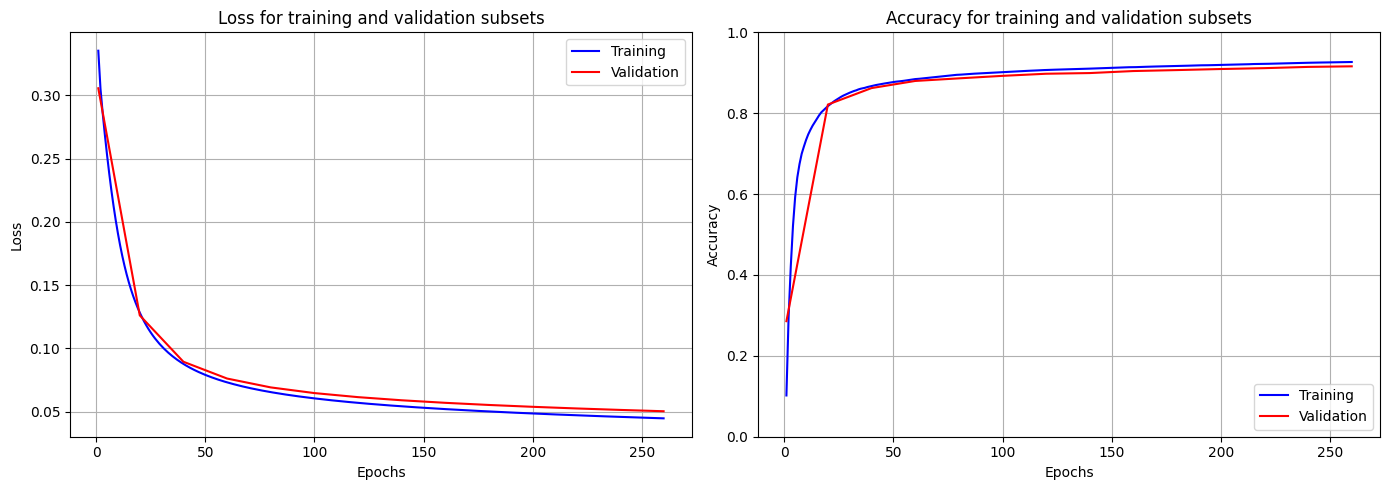

In [93]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

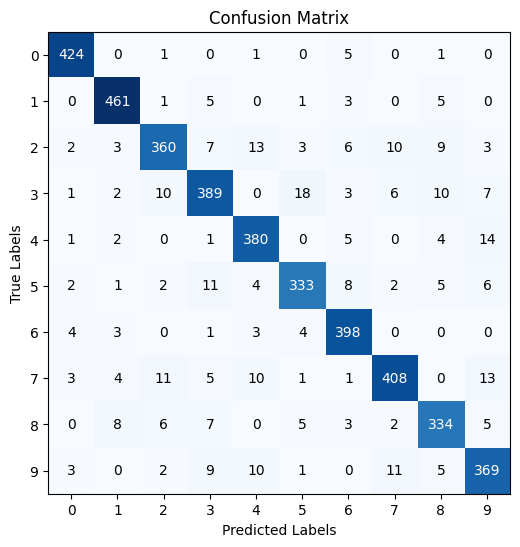

Accuracy: 0.9180952380952381
              precision    recall  f1_score  support
class                                               
0              0.963636  0.981481  0.972477      432
1              0.952479  0.968487  0.960417      476
2              0.916031  0.865385  0.889988      416
3              0.894253  0.872197  0.883087      446
4              0.902613  0.933661  0.917874      407
5              0.909836  0.890374  0.900000      374
6              0.921296  0.963680  0.942012      413
7              0.929385  0.894737  0.911732      456
8              0.895442  0.902703  0.899058      370
9              0.884892  0.900000  0.892382      410
weighted_avg   0.918008  0.918095  0.917825     4200


In [94]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

##### Learning rate: 0.5

In [95]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.5)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.61s | val loss 0.288 | valid accuracy 0.349 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.75s | val loss 0.088 | valid accuracy 0.843 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.29s | val loss 0.059 | valid accuracy 0.898 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.28s | val loss 0.047 | valid accuracy 0.920 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.39s | val loss 0.041 | valid accuracy 0.931 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.37s | val loss 0.044 | valid accuracy 0.923 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.30s | val loss 0.035 | valid accuracy 0.943 |
----------------------------------

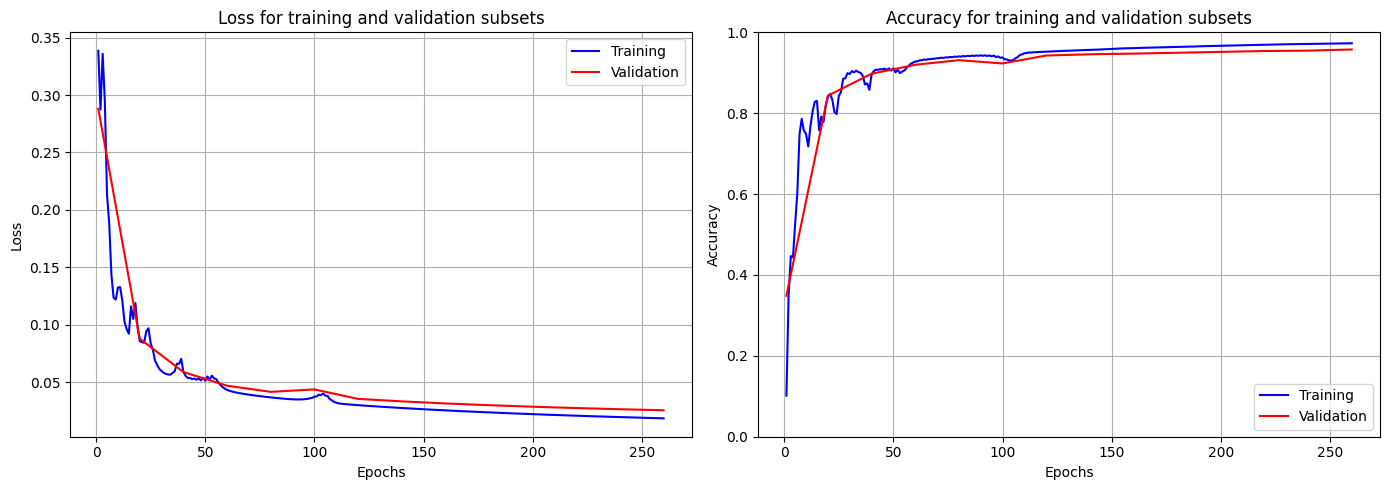

In [96]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

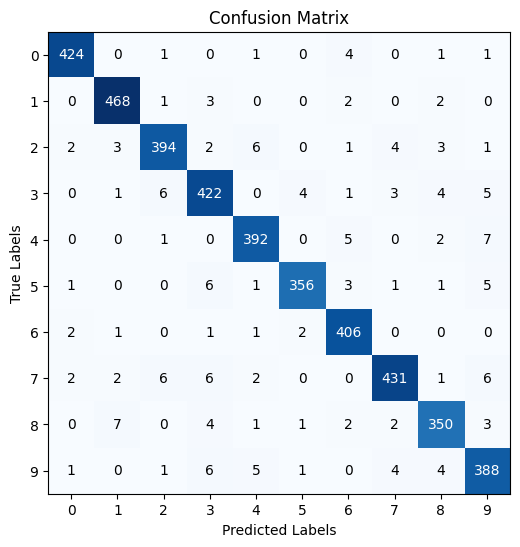

Accuracy: 0.9597619047619048
              precision    recall  f1_score  support
class                                               
0              0.981481  0.981481  0.981481      432
1              0.970954  0.983193  0.977035      476
2              0.960976  0.947115  0.953995      416
3              0.937778  0.946188  0.941964      446
4              0.958435  0.963145  0.960784      407
5              0.978022  0.951872  0.964770      374
6              0.957547  0.983051  0.970131      413
7              0.968539  0.945175  0.956715      456
8              0.951087  0.945946  0.948509      370
9              0.932692  0.946341  0.939467      410
weighted_avg   0.959876  0.959762  0.959754     4200


In [97]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

##### Learning rate: 1

In [98]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.32s | val loss 0.343 | valid accuracy 0.265 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.49s | val loss 4.186 | valid accuracy 0.091 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.38s | val loss 4.186 | valid accuracy 0.091 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.40s | val loss 4.186 | valid accuracy 0.091 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.38s | val loss 4.186 | valid accuracy 0.091 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.38s | val loss 4.186 | valid accuracy 0.091 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.38s | val loss 4.186 | valid accuracy 0.091 |
----------------------------------

KeyboardInterrupt: 

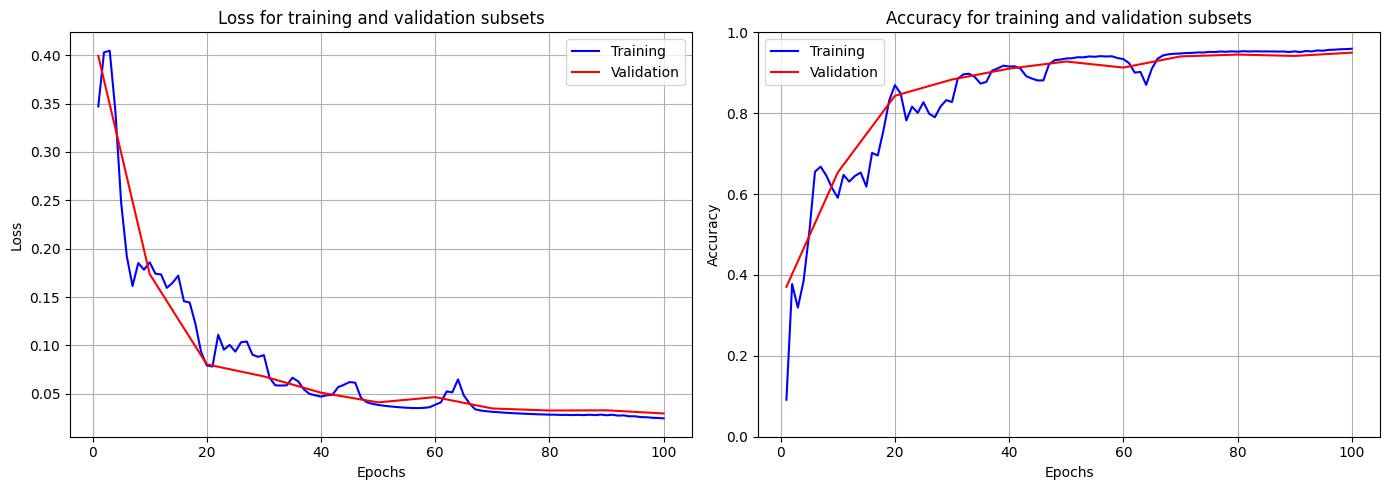

In [84]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

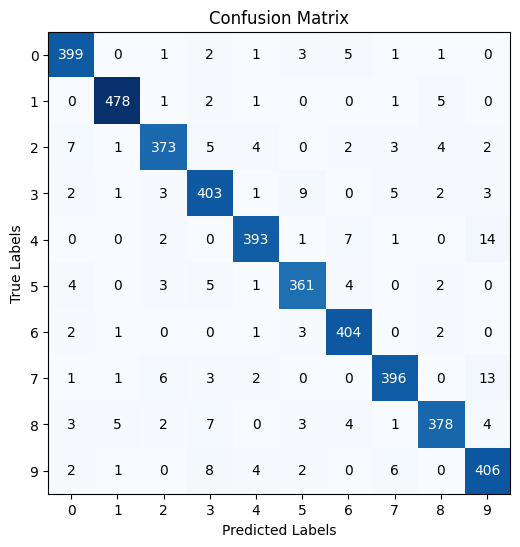

Accuracy: 0.9502380952380952
              precision    recall  f1_score  support
class                                               
0              0.950000  0.966102  0.957983      413
1              0.979508  0.979508  0.979508      488
2              0.953964  0.930175  0.941919      401
3              0.926437  0.939394  0.932870      429
4              0.963235  0.940191  0.951574      418
5              0.945026  0.950000  0.947507      380
6              0.948357  0.978208  0.963051      413
7              0.956522  0.938389  0.947368      422
8              0.959391  0.928747  0.943820      407
9              0.918552  0.946387  0.932262      429
weighted_avg   0.950459  0.950238  0.950232     4200


In [85]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

#### Adam Optimizer

##### Learning rate: 0.0005

In [99]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.0005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.61s | val loss 0.308 | valid accuracy 0.209 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.30s | val loss 0.089 | valid accuracy 0.858 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.32s | val loss 0.057 | valid accuracy 0.906 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.31s | val loss 0.047 | valid accuracy 0.922 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.31s | val loss 0.041 | valid accuracy 0.932 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.35s | val loss 0.037 | valid accuracy 0.939 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.30s | val loss 0.033 | valid accuracy 0.944 |
----------------------------------

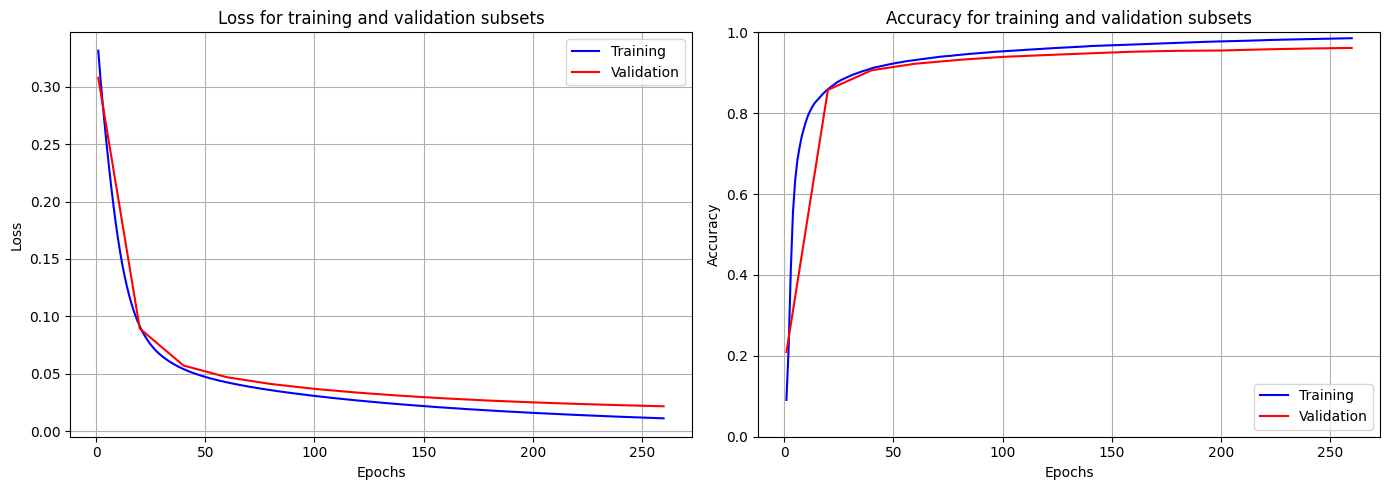

In [100]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

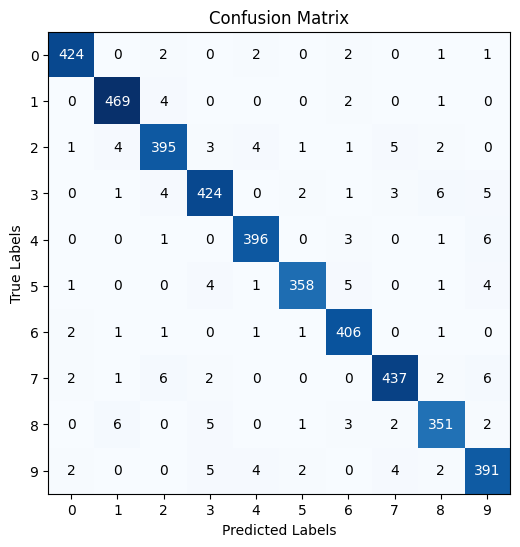

Accuracy: 0.9645238095238096
              precision    recall  f1_score  support
class                                               
0              0.981481  0.981481  0.981481      432
1              0.973029  0.985294  0.979123      476
2              0.956416  0.949519  0.952955      416
3              0.957111  0.950673  0.953881      446
4              0.970588  0.972973  0.971779      407
5              0.980822  0.957219  0.968877      374
6              0.959811  0.983051  0.971292      413
7              0.968958  0.958333  0.963616      456
8              0.953804  0.948649  0.951220      370
9              0.942169  0.953659  0.947879      410
weighted_avg   0.964572  0.964524  0.964507     4200


In [101]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

##### Learning rate: 0.001

In [102]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.41s | val loss 0.297 | valid accuracy 0.319 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.31s | val loss 0.062 | valid accuracy 0.893 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.30s | val loss 0.046 | valid accuracy 0.927 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.30s | val loss 0.038 | valid accuracy 0.939 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.31s | val loss 0.032 | valid accuracy 0.944 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.29s | val loss 0.028 | valid accuracy 0.952 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.31s | val loss 0.025 | valid accuracy 0.958 |
----------------------------------

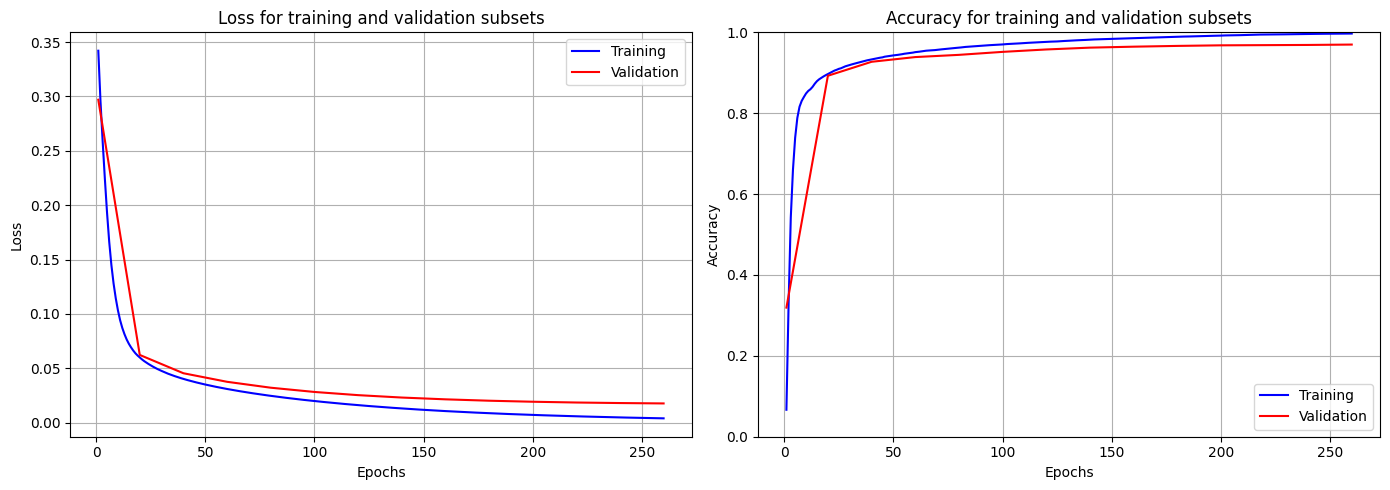

In [103]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

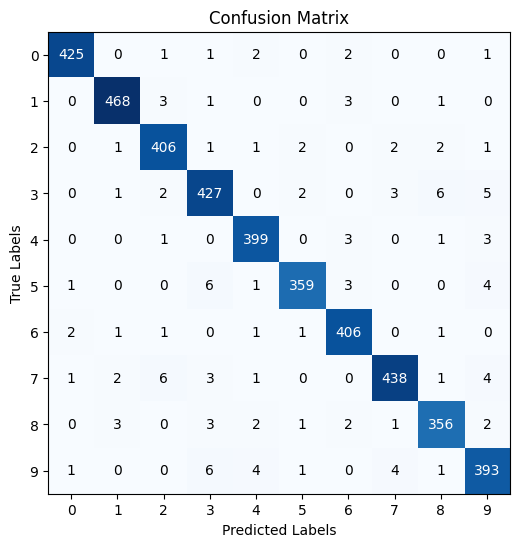

Accuracy: 0.9707142857142858
              precision    recall  f1_score  support
class                                               
0              0.988372  0.983796  0.986079      432
1              0.983193  0.983193  0.983193      476
2              0.966667  0.975962  0.971292      416
3              0.953125  0.957399  0.955257      446
4              0.970803  0.980344  0.975550      407
5              0.980874  0.959893  0.970270      374
6              0.968974  0.983051  0.975962      413
7              0.977679  0.960526  0.969027      456
8              0.964770  0.962162  0.963464      370
9              0.951574  0.958537  0.955043      410
weighted_avg   0.970782  0.970714  0.970718     4200


In [104]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

##### Learning rate: 0.005

In [105]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.36s | val loss 0.274 | valid accuracy 0.447 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.28s | val loss 0.051 | valid accuracy 0.912 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.29s | val loss 0.033 | valid accuracy 0.944 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.28s | val loss 0.025 | valid accuracy 0.957 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.27s | val loss 0.021 | valid accuracy 0.963 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.30s | val loss 0.019 | valid accuracy 0.966 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.29s | val loss 0.018 | valid accuracy 0.968 |
----------------------------------

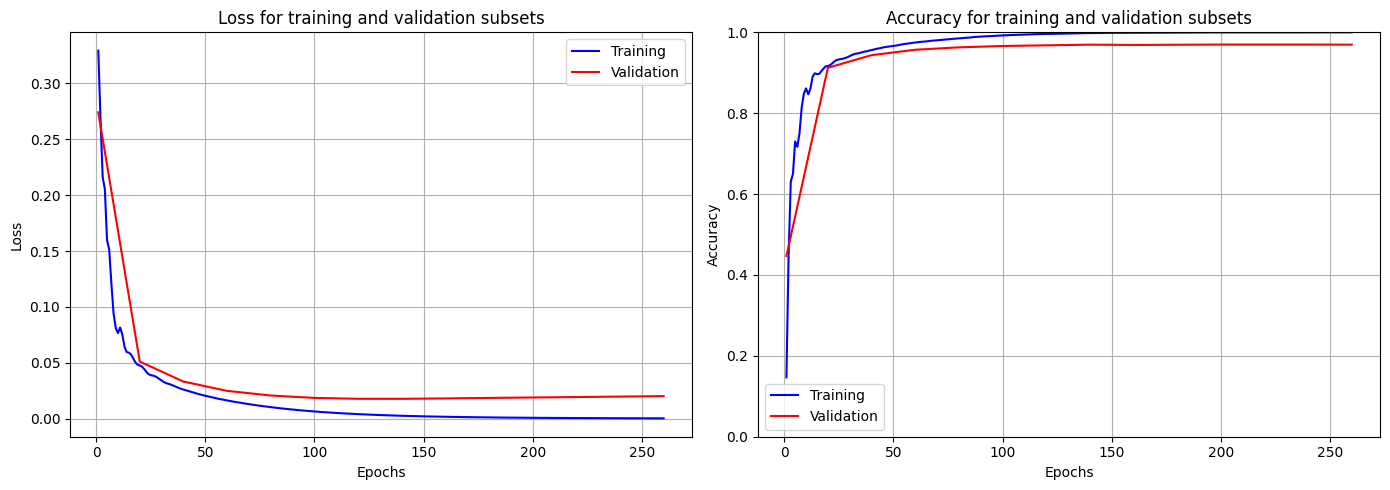

In [106]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

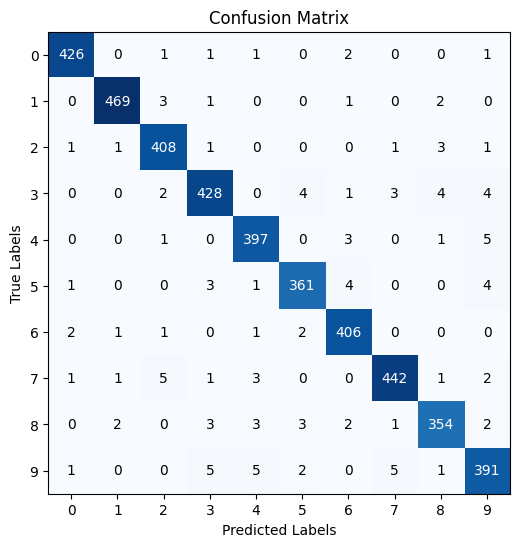

Accuracy: 0.9719047619047619
              precision    recall  f1_score  support
class                                               
0              0.986111  0.986111  0.986111      432
1              0.989451  0.985294  0.987368      476
2              0.969121  0.980769  0.974910      416
3              0.966140  0.959641  0.962880      446
4              0.965937  0.975430  0.970660      407
5              0.970430  0.965241  0.967828      374
6              0.968974  0.983051  0.975962      413
7              0.977876  0.969298  0.973568      456
8              0.967213  0.956757  0.961957      370
9              0.953659  0.953659  0.953659      410
weighted_avg   0.971923  0.971905  0.971896     4200


In [107]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

##### Learning rate: 0.01

In [108]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.19s | val loss 0.393 | valid accuracy 0.376 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.18s | val loss 0.057 | valid accuracy 0.900 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.18s | val loss 0.032 | valid accuracy 0.945 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.18s | val loss 0.024 | valid accuracy 0.958 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.20s | val loss 0.021 | valid accuracy 0.963 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.18s | val loss 0.020 | valid accuracy 0.966 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.19s | val loss 0.020 | valid accuracy 0.966 |
----------------------------------

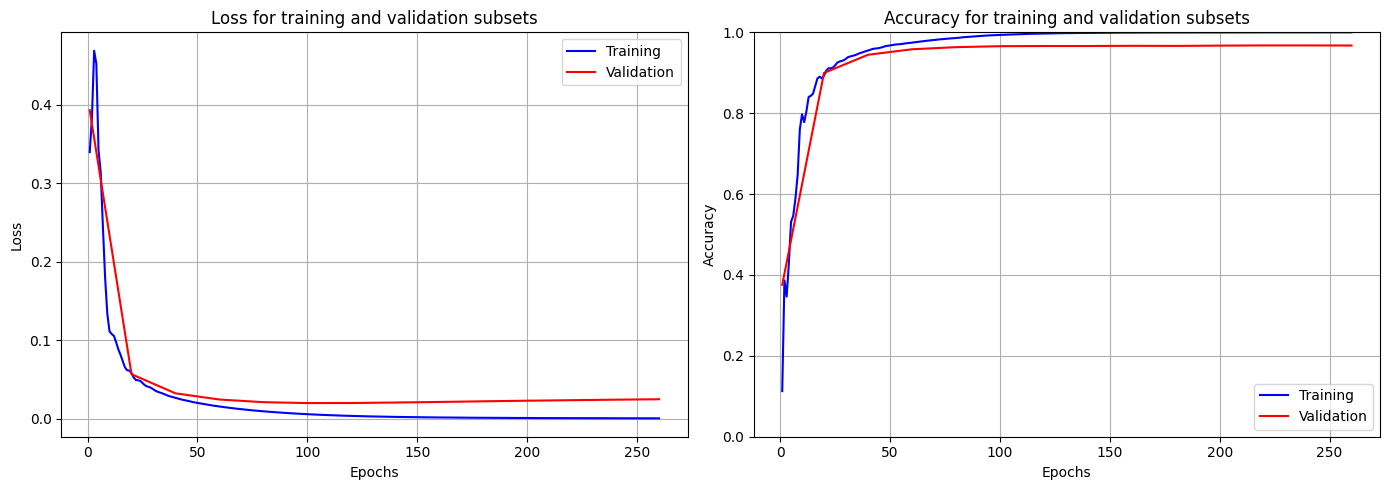

In [109]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

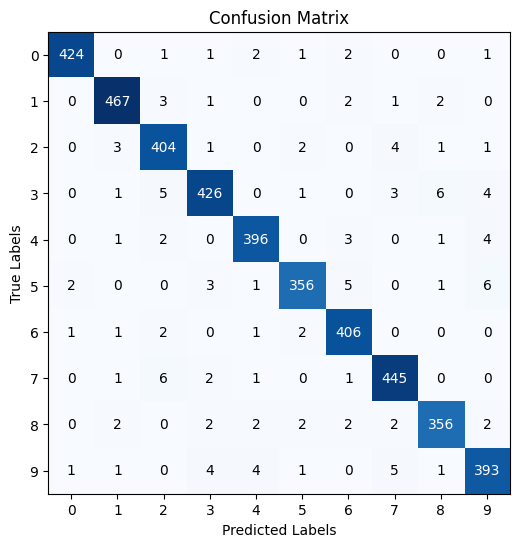

Accuracy: 0.9697619047619047
              precision    recall  f1_score  support
class                                               
0              0.990654  0.981481  0.986047      432
1              0.979036  0.981092  0.980063      476
2              0.955083  0.971154  0.963051      416
3              0.968182  0.955157  0.961625      446
4              0.972973  0.972973  0.972973      407
5              0.975342  0.951872  0.963464      374
6              0.964371  0.983051  0.973621      413
7              0.967391  0.975877  0.971616      456
8              0.967391  0.962162  0.964770      370
9              0.956204  0.958537  0.957369      410
weighted_avg   0.969828  0.969762  0.969757     4200


In [110]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

##### Learning rate: 0.05

In [111]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.05)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  1.19s | val loss 2.391 | valid accuracy 0.114 |
--------------------------------------------------------------------
| Epoch  20 | time:  1.19s | val loss 3.333 | valid accuracy 0.246 |
--------------------------------------------------------------------
| Epoch  40 | time:  1.20s | val loss 3.452 | valid accuracy 0.240 |
--------------------------------------------------------------------
| Epoch  60 | time:  1.28s | val loss 3.595 | valid accuracy 0.218 |
--------------------------------------------------------------------
| Epoch  80 | time:  1.91s | val loss 3.571 | valid accuracy 0.218 |
--------------------------------------------------------------------
| Epoch 100 | time:  1.49s | val loss 3.516 | valid accuracy 0.221 |
--------------------------------------------------------------------
| Epoch 120 | time:  1.23s | val loss 3.550 | valid accuracy 0.197 |
----------------------------------

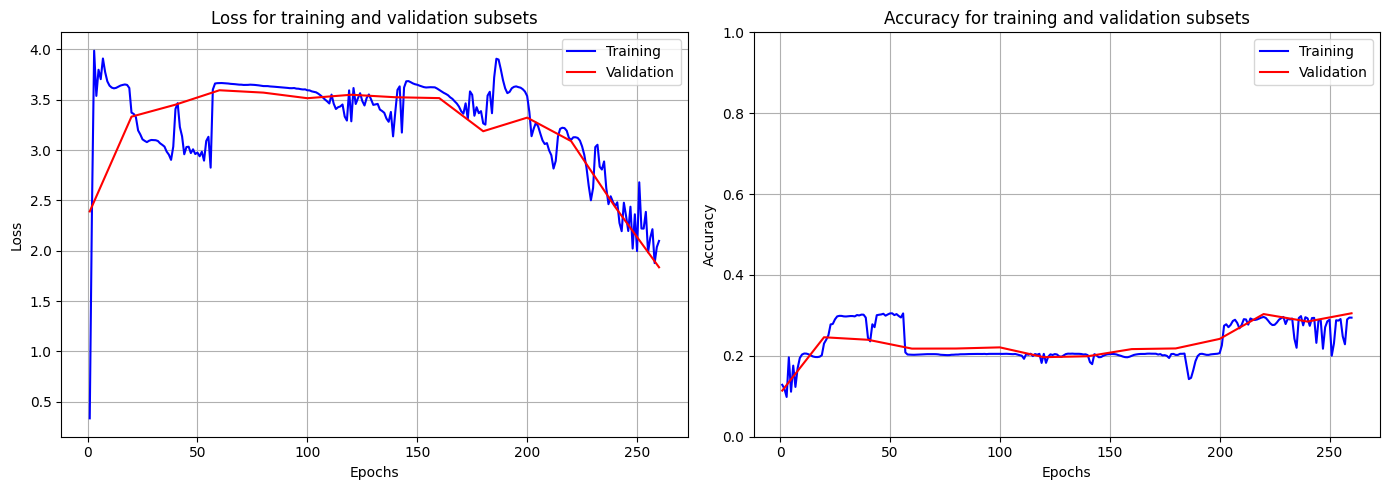

In [112]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

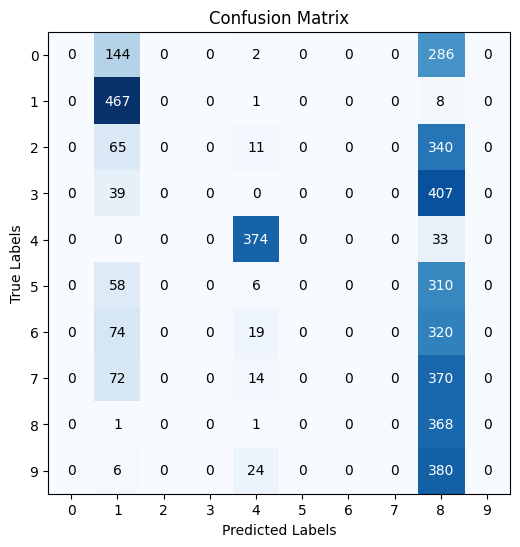

Accuracy: 0.28785714285714287
              precision    recall  f1_score  support
class                                               
0              0.000000  0.000000  0.000000      432
1              0.504320  0.981092  0.666191      476
2              0.000000  0.000000  0.000000      416
3              0.000000  0.000000  0.000000      446
4              0.827434  0.918919  0.870780      407
5              0.000000  0.000000  0.000000      374
6              0.000000  0.000000  0.000000      413
7              0.000000  0.000000  0.000000      456
8              0.130404  0.994595  0.230576      370
9              0.000000  0.000000  0.000000      410
weighted_avg   0.148826  0.287857  0.180197     4200


In [113]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

#### Different structures of network

##### {ReLU, ReLU, Softmax}

In [115]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.70s | val loss 0.435 | valid accuracy 0.361 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.52s | val loss 0.048 | valid accuracy 0.920 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.40s | val loss 0.024 | valid accuracy 0.958 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.70s | val loss 0.019 | valid accuracy 0.969 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.66s | val loss 0.019 | valid accuracy 0.972 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.73s | val loss 0.021 | valid accuracy 0.969 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.63s | val loss 0.023 | valid accuracy 0.971 |
----------------------------------

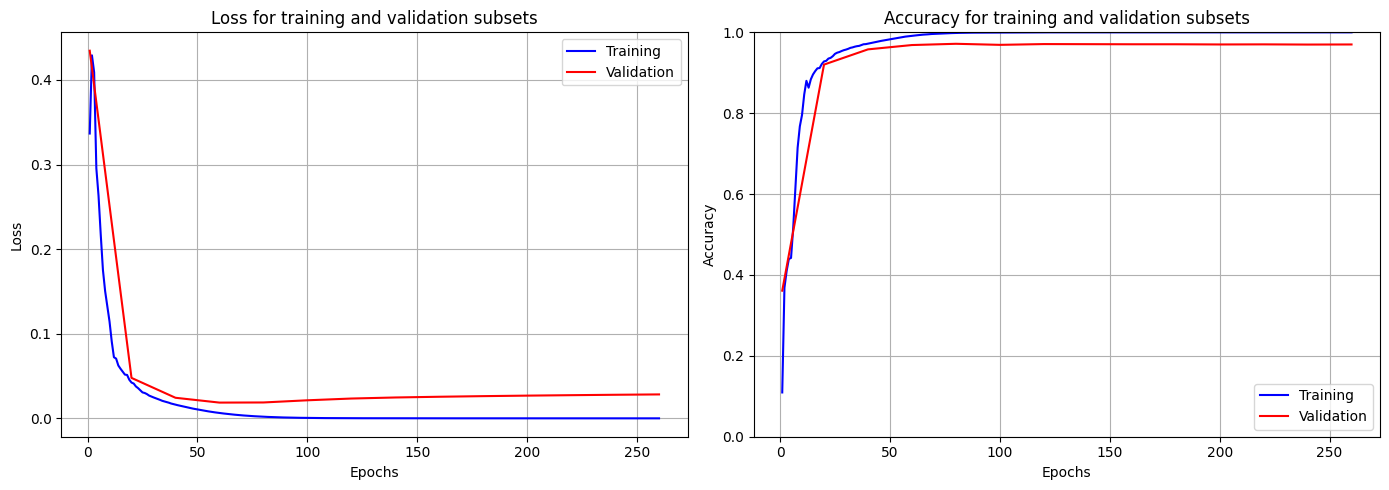

In [116]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

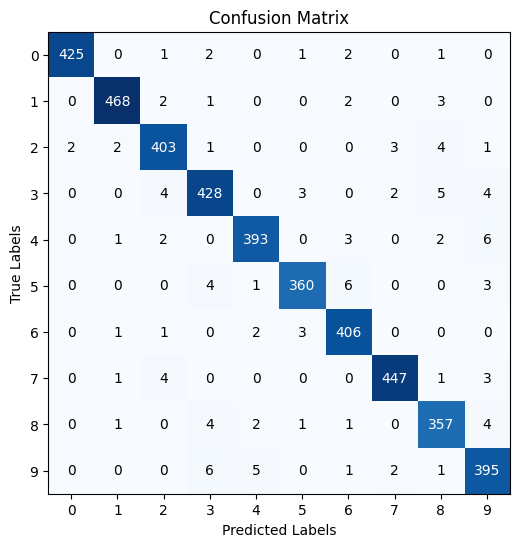

Accuracy: 0.9719047619047619
              precision    recall  f1_score  support
class                                               
0              0.995316  0.983796  0.989523      432
1              0.987342  0.983193  0.985263      476
2              0.966427  0.968750  0.967587      416
3              0.959641  0.959641  0.959641      446
4              0.975186  0.965602  0.970370      407
5              0.978261  0.962567  0.970350      374
6              0.964371  0.983051  0.973621      413
7              0.984581  0.980263  0.982418      456
8              0.954545  0.964865  0.959677      370
9              0.949519  0.963415  0.956416      410
weighted_avg   0.972022  0.971905  0.971935     4200


In [117]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test)
confusion_matrix(Y_test, Y_pred, class_labels=range(10))
print_metrics(accuracy,metrics)

## Fashion MNIST Data

### Load Data

In [118]:
# URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data
data1 = pd.read_csv('../datos/fashion-mnist_train.csv')
data2 = pd.read_csv('../datos/fashion-mnist_test.csv')
data = pd.concat([data1, data2])
data = np.array(data)

In [119]:
labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Split Data

In [120]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

# Normalización
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [121]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

#### SGD Optimizer

##### Learning rate: 0.01

In [126]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.40s | val loss 0.326 | valid accuracy 0.153 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.14s | val loss 0.249 | valid accuracy 0.551 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.15s | val loss 0.209 | valid accuracy 0.639 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.37s | val loss 0.184 | valid accuracy 0.671 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.17s | val loss 0.169 | valid accuracy 0.688 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.15s | val loss 0.158 | valid accuracy 0.703 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.19s | val loss 0.149 | valid accuracy 0.719 |
----------------------------------

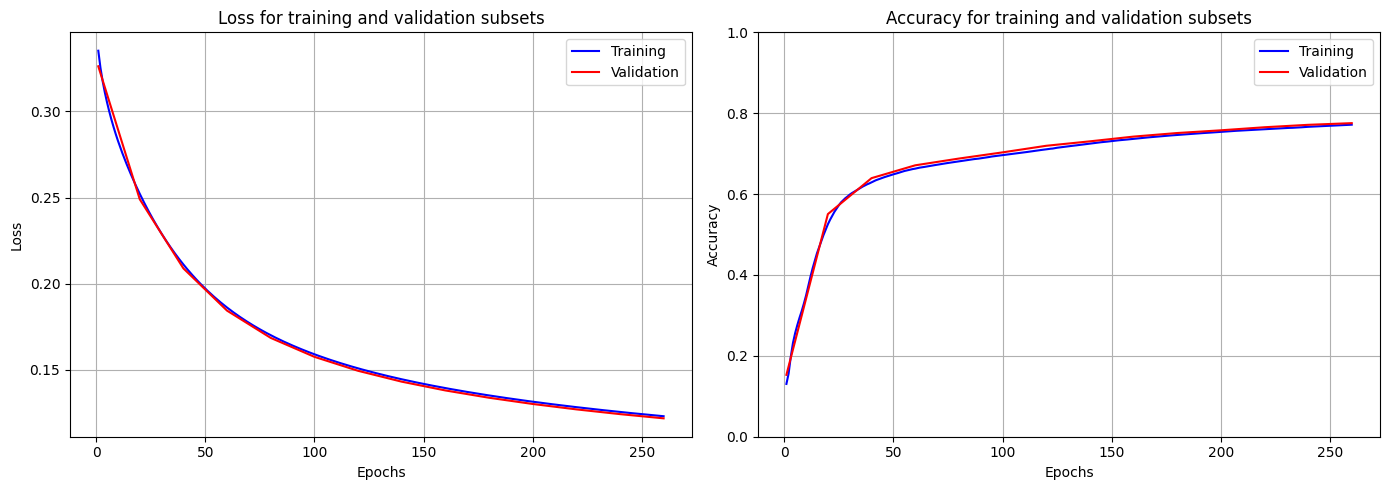

In [127]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

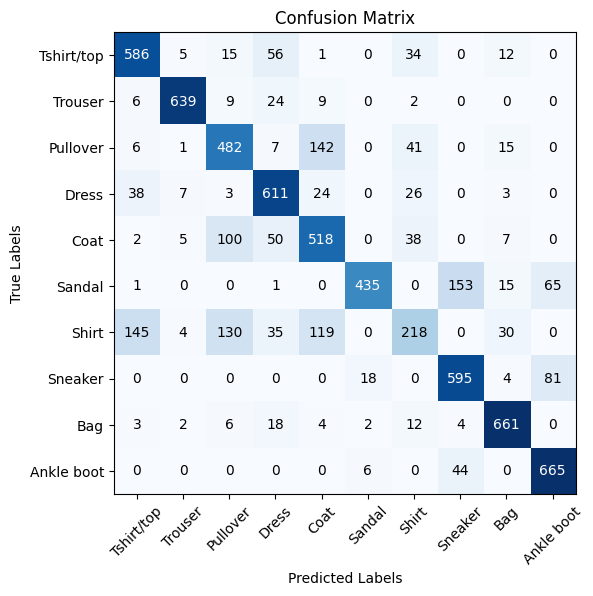

Accuracy: 0.7728571428571429
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.744600  0.826516  0.783422      709
Trouser        0.963801  0.927431  0.945266      689
Pullover       0.646980  0.694524  0.669910      694
Dress          0.761845  0.858146  0.807133      712
Coat           0.634027  0.719444  0.674040      720
Sandal         0.943601  0.649254  0.769231      670
Shirt          0.587601  0.320117  0.414449      681
Sneaker        0.747487  0.852436  0.796519      698
Bag            0.884873  0.928371  0.906100      712
Ankle boot     0.819975  0.930070  0.871560      715
weighted_avg   0.772906  0.772857  0.764792     7000


In [128]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

##### Learning rate: 0.1

In [122]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.59s | val loss 0.337 | valid accuracy 0.221 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.61s | val loss 0.139 | valid accuracy 0.719 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.36s | val loss 0.122 | valid accuracy 0.747 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.20s | val loss 0.115 | valid accuracy 0.754 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.33s | val loss 0.107 | valid accuracy 0.775 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.30s | val loss 0.099 | valid accuracy 0.802 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.19s | val loss 0.096 | valid accuracy 0.806 |
----------------------------------

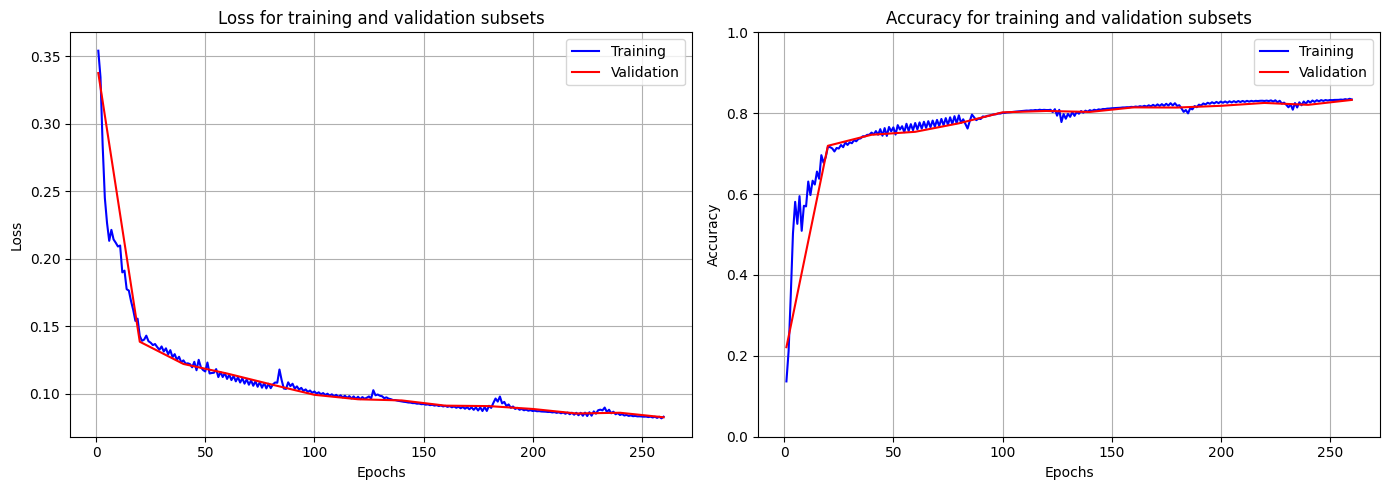

In [123]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

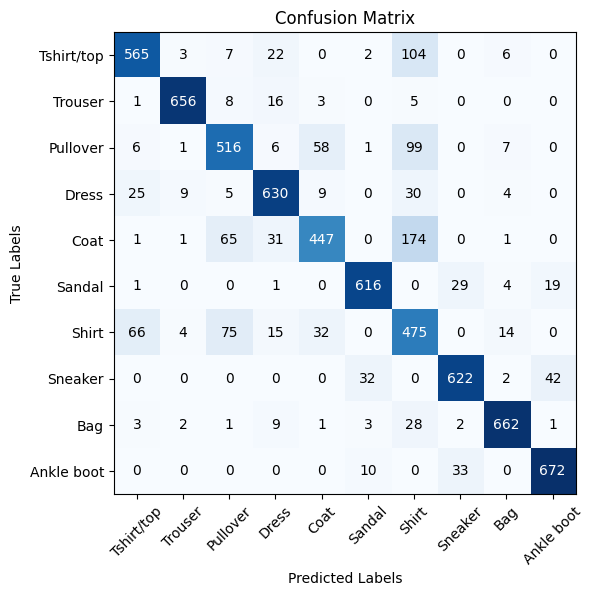

Accuracy: 0.8372857142857143
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.845808  0.796897  0.820625      709
Trouser        0.970414  0.952104  0.961172      689
Pullover       0.762186  0.743516  0.752735      694
Dress          0.863014  0.884831  0.873786      712
Coat           0.812727  0.620833  0.703937      720
Sandal         0.927711  0.919403  0.923538      670
Shirt          0.519126  0.697504  0.595238      681
Sneaker        0.906706  0.891117  0.898844      698
Bag            0.945714  0.929775  0.937677      712
Ankle boot     0.915531  0.939860  0.927536      715
weighted_avg   0.847544  0.837286  0.839682     7000


In [124]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

##### Learning rate: 0.5

In [125]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.5)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.96s | val loss 0.574 | valid accuracy 0.349 |
--------------------------------------------------------------------
| Epoch  20 | time:  3.81s | val loss 4.118 | valid accuracy 0.106 |
--------------------------------------------------------------------
| Epoch  40 | time:  3.96s | val loss 4.118 | valid accuracy 0.106 |
--------------------------------------------------------------------
| Epoch  60 | time:  3.82s | val loss 4.118 | valid accuracy 0.106 |
--------------------------------------------------------------------
| Epoch  80 | time:  4.01s | val loss 4.118 | valid accuracy 0.106 |
--------------------------------------------------------------------


KeyboardInterrupt: 

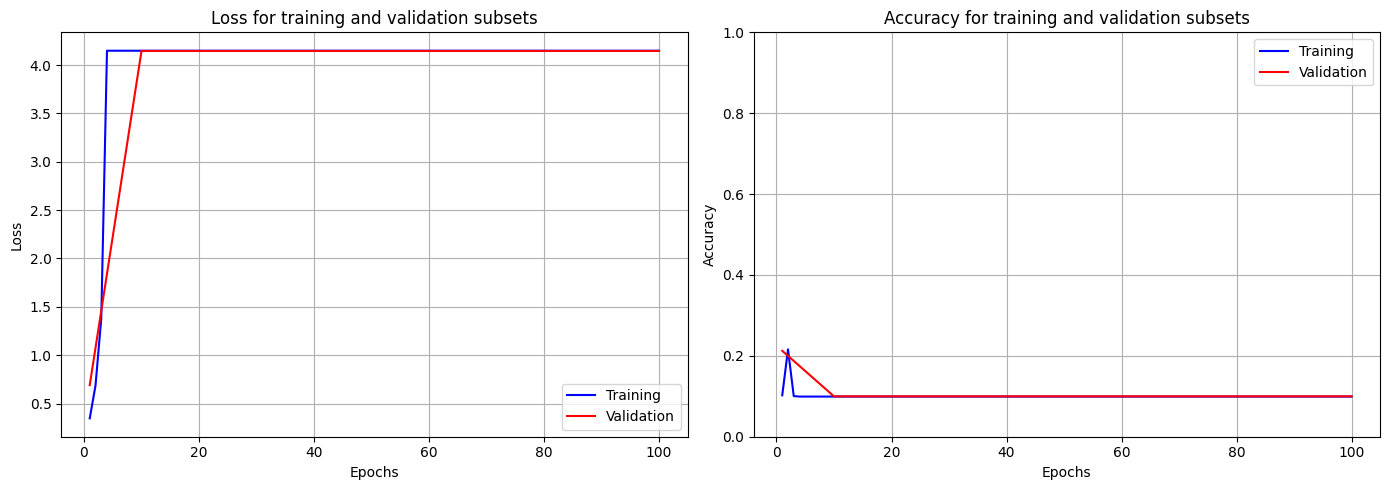

In [62]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

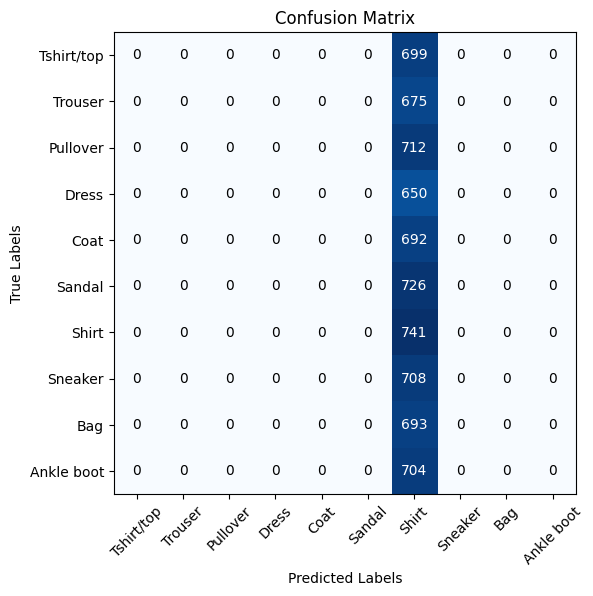

Accuracy: 0.10585714285714286
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.000000  0.000000  0.000000      699
Trouser        0.000000  0.000000  0.000000      675
Pullover       0.000000  0.000000  0.000000      712
Dress          0.000000  0.000000  0.000000      650
Coat           0.000000  0.000000  0.000000      692
Sandal         0.000000  0.000000  0.000000      726
Shirt          0.105857  1.000000  0.191448      741
Sneaker        0.000000  0.000000  0.000000      708
Bag            0.000000  0.000000  0.000000      693
Ankle boot     0.000000  0.000000  0.000000      704
weighted_avg   0.011206  0.105857  0.020266     7000


In [63]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

#### Adam Optimizer

##### Learning rate: 0.0005

In [130]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.0005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.64s | val loss 0.296 | valid accuracy 0.294 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.18s | val loss 0.111 | valid accuracy 0.783 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.36s | val loss 0.088 | valid accuracy 0.824 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.45s | val loss 0.079 | valid accuracy 0.842 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.28s | val loss 0.073 | valid accuracy 0.854 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.31s | val loss 0.069 | valid accuracy 0.865 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.41s | val loss 0.066 | valid accuracy 0.870 |
----------------------------------

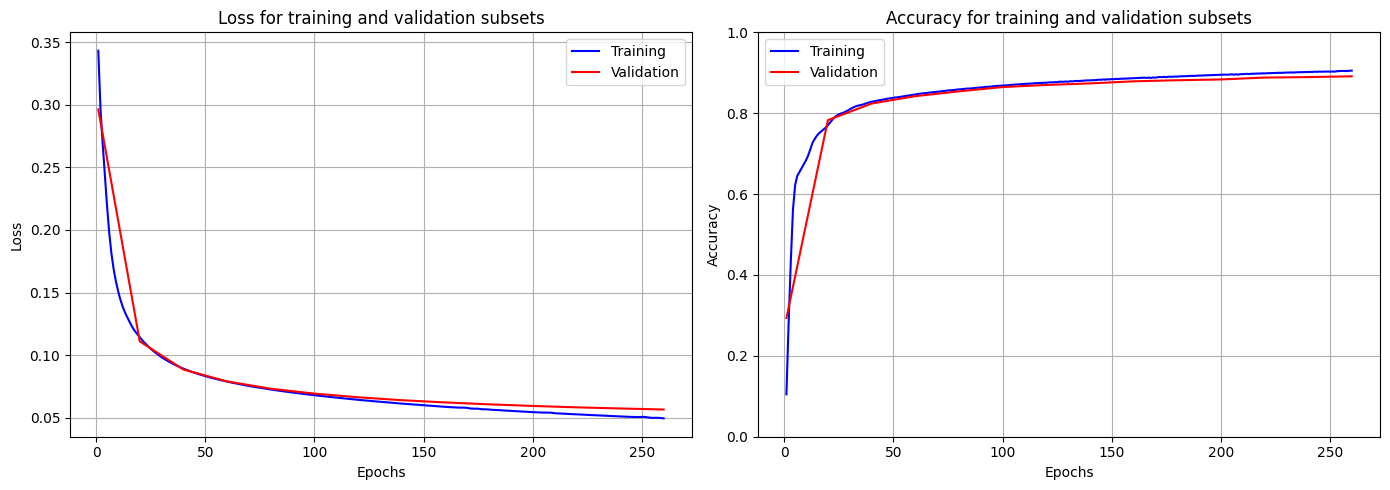

In [131]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

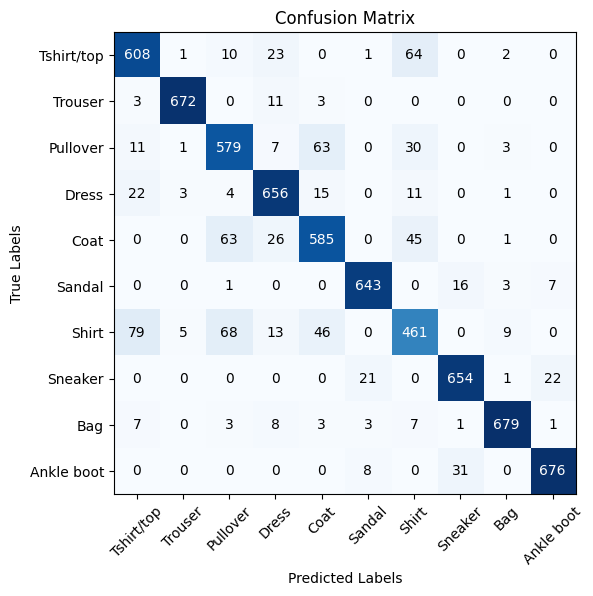

Accuracy: 0.8875714285714286
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.832877  0.857546  0.845031      709
Trouser        0.985337  0.975327  0.980306      689
Pullover       0.795330  0.834294  0.814346      694
Dress          0.881720  0.921348  0.901099      712
Coat           0.818182  0.812500  0.815331      720
Sandal         0.951183  0.959701  0.955423      670
Shirt          0.745955  0.676946  0.709777      681
Sneaker        0.931624  0.936963  0.934286      698
Bag            0.971388  0.953652  0.962438      712
Ankle boot     0.957507  0.945455  0.951443      715
weighted_avg   0.887150  0.887571  0.887071     7000


In [132]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

##### Learning rate: 0.001

In [133]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.46s | val loss 0.291 | valid accuracy 0.279 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.19s | val loss 0.098 | valid accuracy 0.809 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.30s | val loss 0.081 | valid accuracy 0.839 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.31s | val loss 0.073 | valid accuracy 0.854 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.33s | val loss 0.069 | valid accuracy 0.866 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.68s | val loss 0.065 | valid accuracy 0.873 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.16s | val loss 0.062 | valid accuracy 0.878 |
----------------------------------

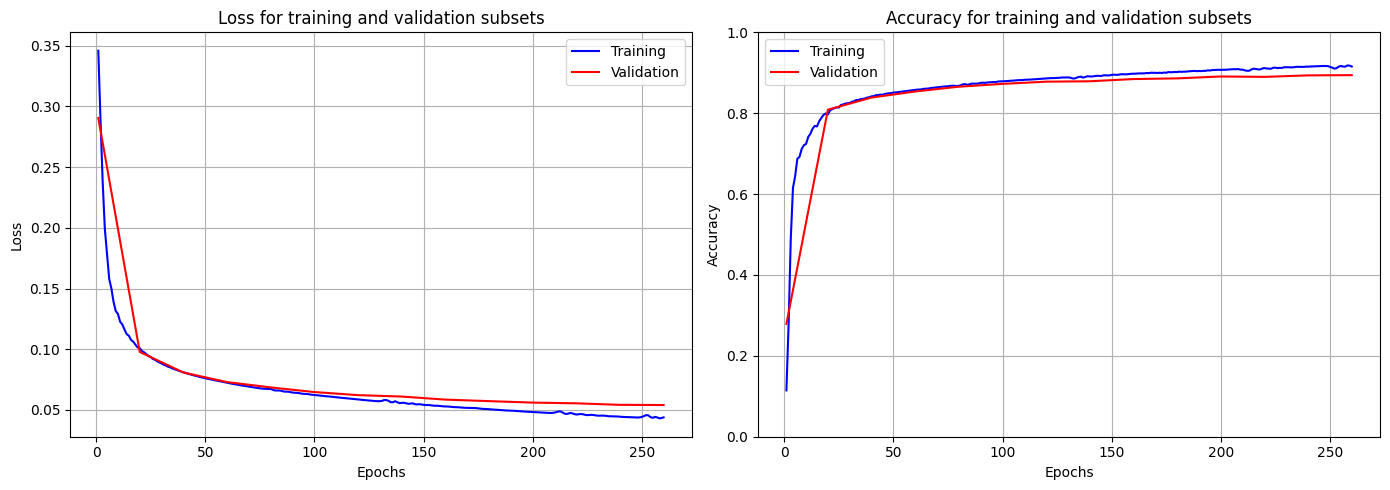

In [134]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

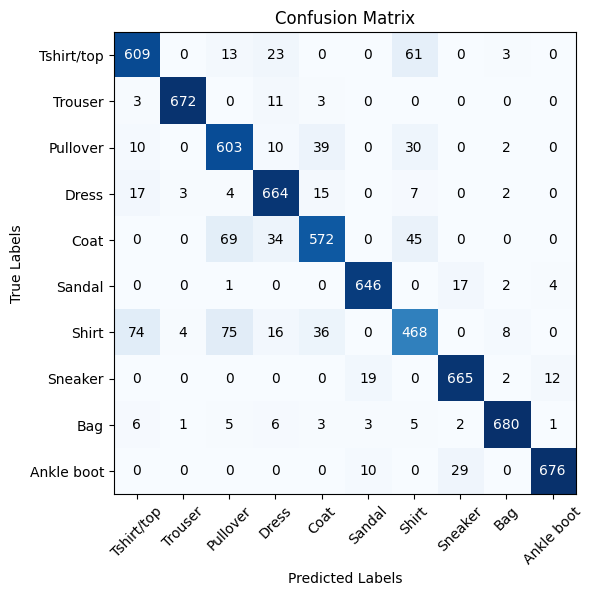

Accuracy: 0.8935714285714286
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.847010  0.858956  0.852941      709
Trouser        0.988235  0.975327  0.981738      689
Pullover       0.783117  0.868876  0.823770      694
Dress          0.869110  0.932584  0.899729      712
Coat           0.856287  0.794444  0.824207      720
Sandal         0.952802  0.964179  0.958457      670
Shirt          0.759740  0.687225  0.721665      681
Sneaker        0.932679  0.952722  0.942594      698
Bag            0.972818  0.955056  0.963855      712
Ankle boot     0.975469  0.945455  0.960227      715
weighted_avg   0.893874  0.893571  0.893038     7000


In [135]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

##### Learning rate: 0.005

In [136]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.43s | val loss 0.497 | valid accuracy 0.369 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.21s | val loss 0.118 | valid accuracy 0.752 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.28s | val loss 0.086 | valid accuracy 0.828 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.56s | val loss 0.071 | valid accuracy 0.855 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.22s | val loss 0.064 | valid accuracy 0.873 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.41s | val loss 0.061 | valid accuracy 0.877 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.60s | val loss 0.058 | valid accuracy 0.883 |
----------------------------------

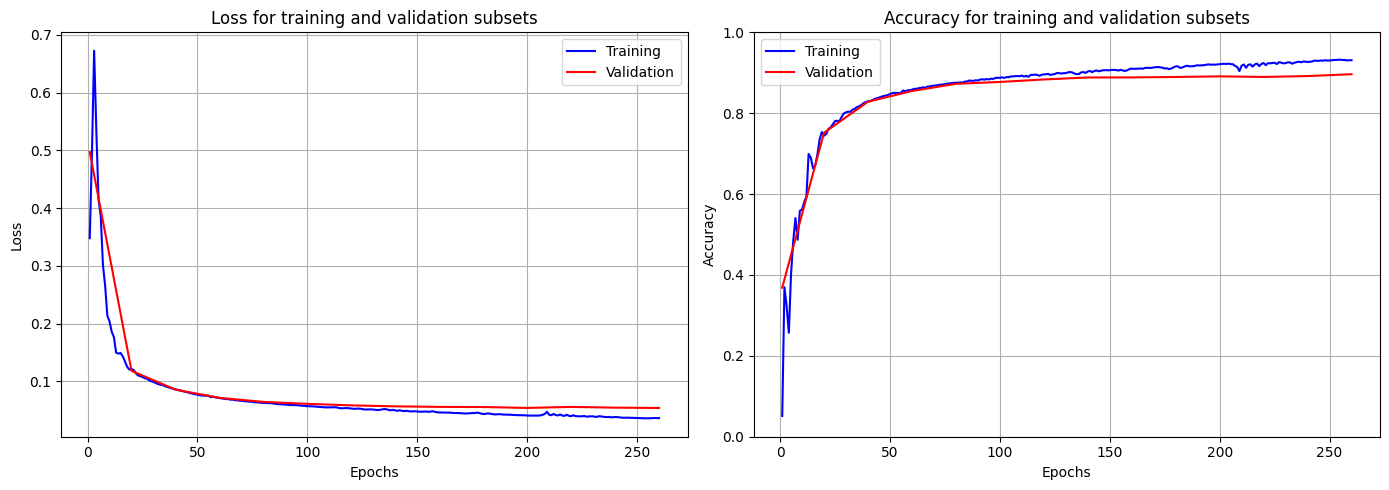

In [137]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

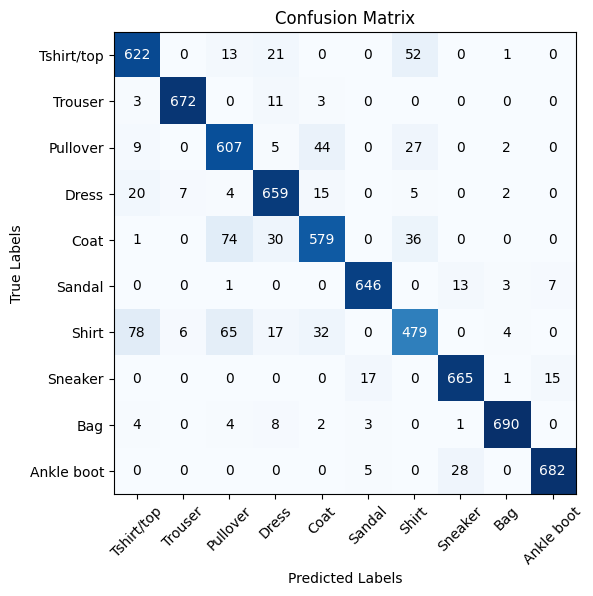

Accuracy: 0.9001428571428571
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.843962  0.877292  0.860304      709
Trouser        0.981022  0.975327  0.978166      689
Pullover       0.790365  0.874640  0.830369      694
Dress          0.877497  0.925562  0.900889      712
Coat           0.857778  0.804167  0.830108      720
Sandal         0.962742  0.964179  0.963460      670
Shirt          0.799666  0.703377  0.748437      681
Sneaker        0.940594  0.952722  0.946619      698
Bag            0.981508  0.969101  0.975265      712
Ankle boot     0.968750  0.953846  0.961240      715
weighted_avg   0.900403  0.900143  0.899560     7000


In [138]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

##### Learning rate: 0.01

In [139]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.26s | val loss 0.555 | valid accuracy 0.167 |
--------------------------------------------------------------------
| Epoch  20 | time:  2.18s | val loss 1.179 | valid accuracy 0.442 |
--------------------------------------------------------------------
| Epoch  40 | time:  2.38s | val loss 0.847 | valid accuracy 0.538 |
--------------------------------------------------------------------
| Epoch  60 | time:  2.17s | val loss 0.130 | valid accuracy 0.696 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.15s | val loss 0.105 | valid accuracy 0.736 |
--------------------------------------------------------------------
| Epoch 100 | time:  2.17s | val loss 0.084 | valid accuracy 0.823 |
--------------------------------------------------------------------
| Epoch 120 | time:  2.36s | val loss 0.073 | valid accuracy 0.852 |
----------------------------------

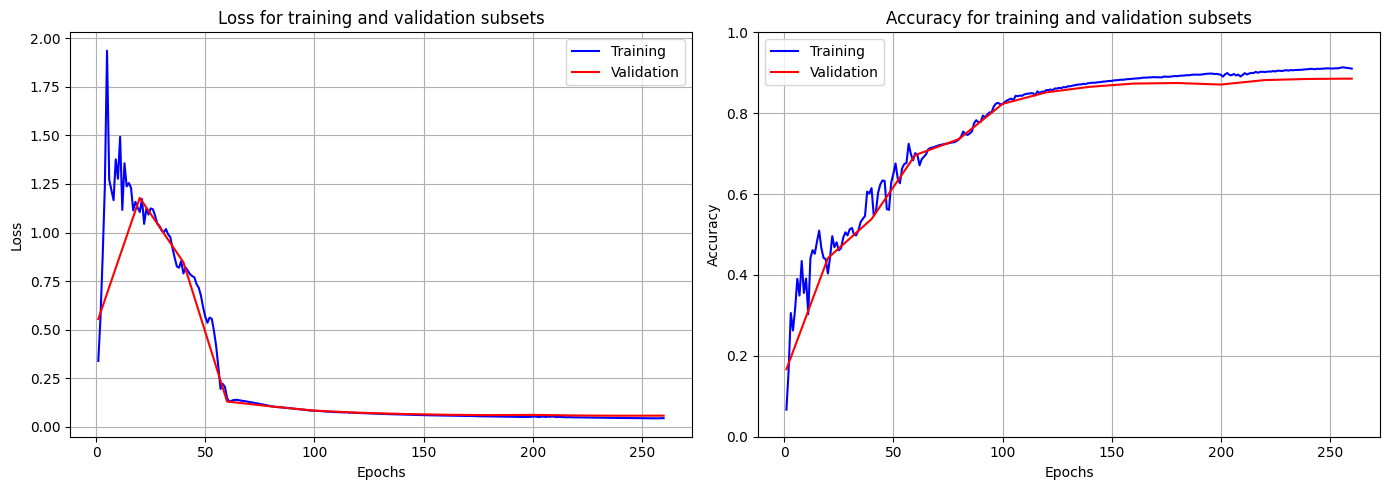

In [140]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

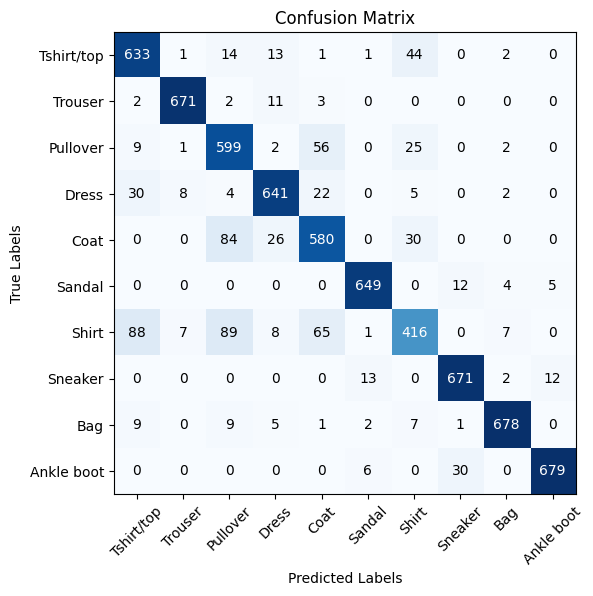

Accuracy: 0.8881428571428571
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.821012  0.892807  0.855405      709
Trouser        0.975291  0.973875  0.974582      689
Pullover       0.747815  0.863112  0.801338      694
Dress          0.907932  0.900281  0.904090      712
Coat           0.796703  0.805556  0.801105      720
Sandal         0.965774  0.968657  0.967213      670
Shirt          0.789374  0.610866  0.688742      681
Sneaker        0.939776  0.961318  0.950425      698
Bag            0.972740  0.952247  0.962385      712
Ankle boot     0.975575  0.949650  0.962438      715
weighted_avg   0.889122  0.888143  0.886919     7000


In [141]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

##### Learning rate: 0.05

In [142]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.05)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  2.13s | val loss 2.762 | valid accuracy 0.270 |
--------------------------------------------------------------------
| Epoch  20 | time:  3.86s | val loss 3.667 | valid accuracy 0.203 |
--------------------------------------------------------------------
| Epoch  40 | time:  3.08s | val loss 3.666 | valid accuracy 0.203 |
--------------------------------------------------------------------
| Epoch  60 | time:  3.10s | val loss 3.666 | valid accuracy 0.203 |
--------------------------------------------------------------------
| Epoch  80 | time:  2.98s | val loss 3.665 | valid accuracy 0.203 |
--------------------------------------------------------------------


KeyboardInterrupt: 

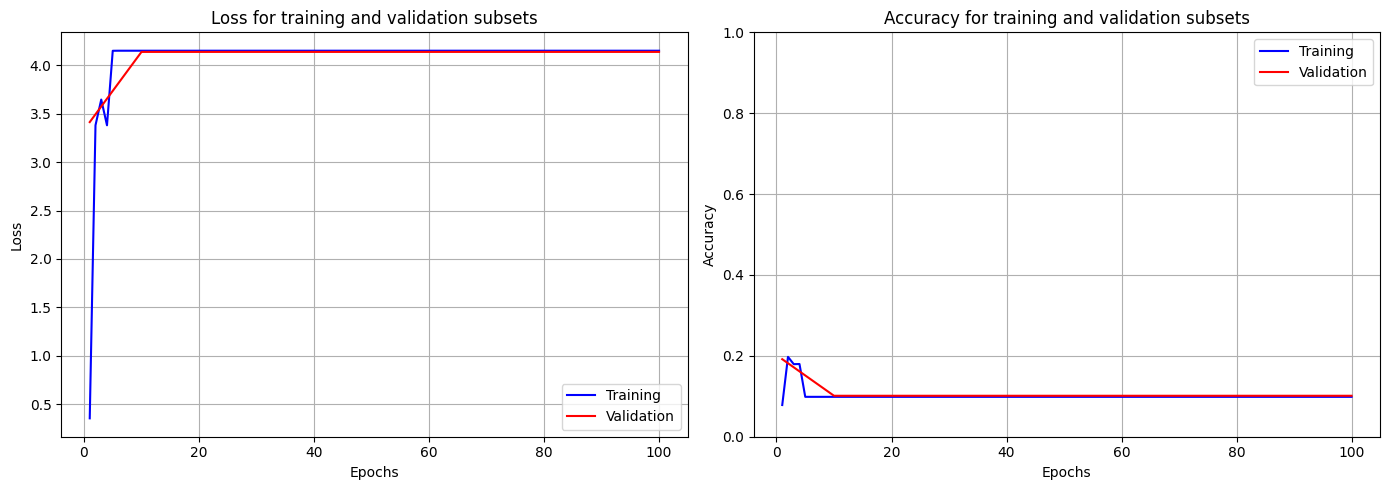

In [45]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

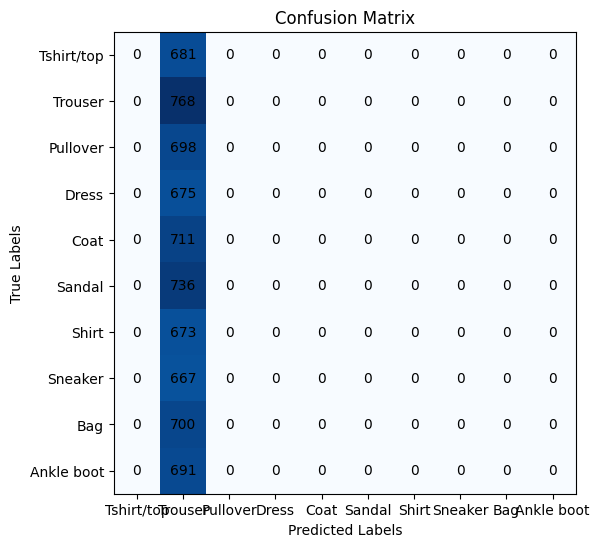

Accuracy: 0.10971428571428571
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.000000  0.000000  0.000000      681
Trouser        0.109714  1.000000  0.197734      768
Pullover       0.000000  0.000000  0.000000      698
Dress          0.000000  0.000000  0.000000      675
Coat           0.000000  0.000000  0.000000      711
Sandal         0.000000  0.000000  0.000000      736
Shirt          0.000000  0.000000  0.000000      673
Sneaker        0.000000  0.000000  0.000000      667
Bag            0.000000  0.000000  0.000000      700
Ankle boot     0.000000  0.000000  0.000000      691
weighted_avg   0.012037  0.109714  0.021694     7000


In [46]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

#### Different structures of network

##### {ReLU, ReLU, Softmax}

In [143]:
layers_config = [
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 784, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20)

--------------------------------------------------------------------
| Epoch   1 | time:  4.07s | val loss 0.768 | valid accuracy 0.254 |
--------------------------------------------------------------------
| Epoch  20 | time:  4.29s | val loss 0.123 | valid accuracy 0.738 |
--------------------------------------------------------------------
| Epoch  40 | time:  3.93s | val loss 0.083 | valid accuracy 0.826 |
--------------------------------------------------------------------
| Epoch  60 | time:  3.77s | val loss 0.069 | valid accuracy 0.859 |
--------------------------------------------------------------------
| Epoch  80 | time:  3.93s | val loss 0.063 | valid accuracy 0.870 |
--------------------------------------------------------------------
| Epoch 100 | time:  4.10s | val loss 0.059 | valid accuracy 0.879 |
--------------------------------------------------------------------
| Epoch 120 | time:  4.79s | val loss 0.057 | valid accuracy 0.886 |
----------------------------------

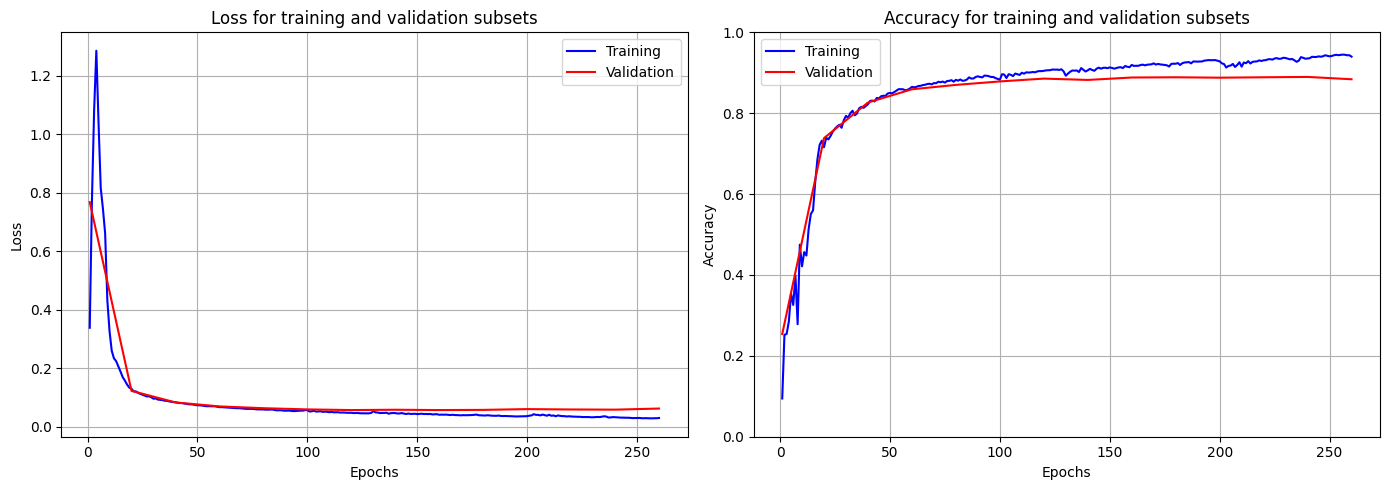

In [144]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)

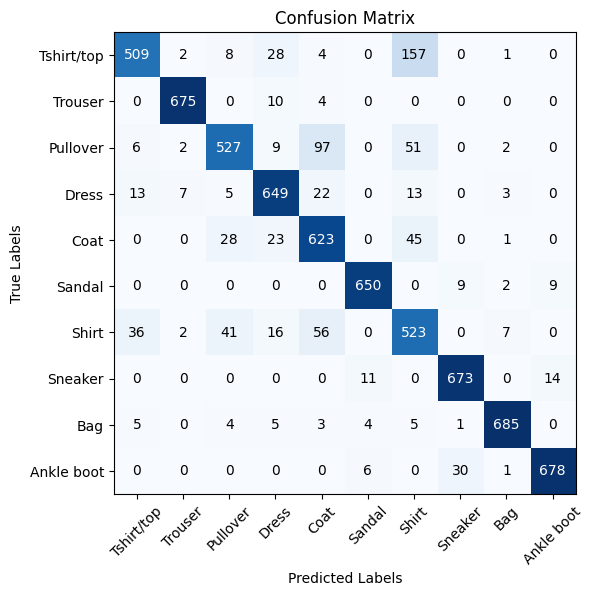

Accuracy: 0.8845714285714286
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.894552  0.717913  0.796557      709
Trouser        0.981105  0.979681  0.980392      689
Pullover       0.859706  0.759366  0.806427      694
Dress          0.877027  0.911517  0.893939      712
Coat           0.770087  0.865278  0.814912      720
Sandal         0.968703  0.970149  0.969426      670
Shirt          0.658690  0.767988  0.709153      681
Sneaker        0.943899  0.964183  0.953933      698
Bag            0.975783  0.962079  0.968883      712
Ankle boot     0.967190  0.948252  0.957627      715
weighted_avg   0.889786  0.884571  0.885139     7000


In [145]:
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)